In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [145]:
video_games_df = pd.read_csv("games.csv")
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [146]:
video_games_df.columns = video_games_df.columns.str.lower()
video_games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Missing Values in "critic_score" and "user_score":** <br>
- The missing values could be due to several reasons such as the game not being reviewed or the data not being avaiable. I could consider filling the missing values with either the mean or median of the respective columns. Doing this I'm assuming that the missing values are missing at random and don't introduce bias. <br>

**Missing Values in "rating":**<br>
- The rating columns missing values could be due to be unavaiable or unassigned ratings. I could explore the distribution of existing ratings and decide whether to impute missing values based on the most common rating or use a seperate category like "Unknown".<br>

In [147]:
video_games_df['critic_score'].fillna(video_games_df["critic_score"].median(), inplace=True)
video_games_df["rating"].fillna("Unknown", inplace=True)

In [148]:
# Searching all rows in the entire DataFrame where any columns has the value "TBD".
tbd_rows = video_games_df[video_games_df.eq("TBD").any(axis=1)]
display(tbd_rows)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [149]:
video_games_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,Unknown


**Decribing Columns with Data Type Changes:** <br>
- "year_of_release" values are represented as floats and need to be converted in a datetime object instead. Doing this will make it easier to handle date-related information.
- "user_score" is being converted to numeric, and 'TBD' values are convereted to NaN. This allows me to perform numerical operations.
- Creating a column named "total_sells" to stored in the sum of "na_sales", "eu_sales", "jp_sales", and "others_sales".

In [150]:
video_games_df["year_of_release"] = pd.to_datetime(
    video_games_df["year_of_release"], format="%Y", errors="coerce"
)

video_games_df["user_score"] = pd.to_numeric(
    video_games_df["user_score"], errors="coerce"
)
video_games_df["total_sales"] = video_games_df[
    ["na_sales", "eu_sales", "jp_sales", "other_sales"]
].sum(axis=1)

video_games_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,71.0,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,71.0,NaN,Unknown,31.38


In [151]:
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     16715 non-null  float64       
 9   user_score       7590 non-null   float64       
 10  rating           16715 non-null  object        
 11  total_sales      16715 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.5+ MB


#### How many games were released in different years?

In [152]:
# Check the number of games released in the different years
games_per_year = video_games_df.groupby("year_of_release")["name"].count()

display(games_per_year)

year_of_release
1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      60
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
Name: name, dtype: int64

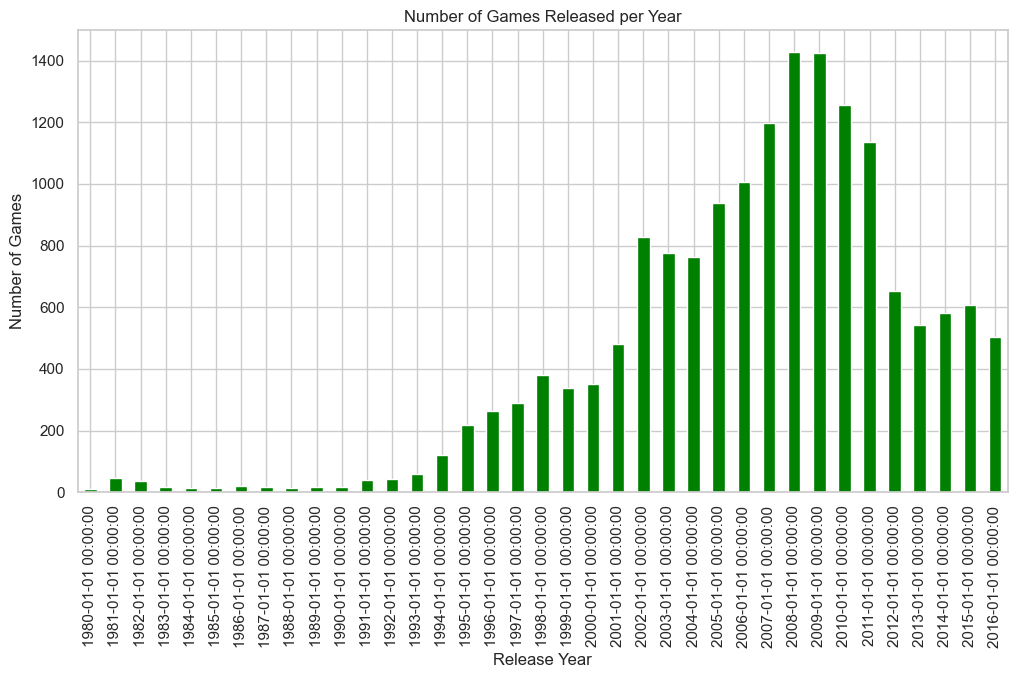

In [153]:
# Plot a bar chart for better visualization
plt.figure(figsize=(12, 6))
games_per_year.plot(kind="bar", color="green")
plt.title("Number of Games Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")
plt.show()

**Observation:** <br>
The increase in game release betwwen 2002 and 2011 could be attributed to several factors related to gaming industry and technology landscape during that period. Here are some possible reasons: <br>

- **Technological Advancements:** The early 2000s saw significant advancements in gaming technology, including improvements in graphics, processing power, and gaming consoles. This could have motivated game developers to create and release more sophisticated and visually appealing games. <br>

- **Introduction of New Consoles:** The launch of new gaming consoles, such as the Xbox 360 (released in 2005), PlayStation 3 (released in 2006), and Nintendo Wii (released in 2006), provided developers with new platforms to target. The availability of these consoles likely increased the overall number of games in the market. <br>

- **Rise of Indie Game Development** The 2000s witnessed a surge in indie game development. With the advent of digital distribution platforms and easier access to game development tools, smaller studios and individual developers could create and release games more easily .<br>

- **Globalization of the Gaming Industry:** The gaming industry became more globalized during this period. Game developers from various regions around the world had better opportunities to create and distribute their games to a broader audience. <br>

- **Increased Consumer Demand:** As gaming became more mainstream, the demand for diverse gaming experiences grew. This increased demand could have driven developers to release a larger variety of games to cater to different preferences. <br>

- **Online Gaming and Multiplayer Trends:** The popularity of online gaming and multiplayer experiences grew during this time. Developers responded to this trend by creating more online-enabled games, expanding the range of gaming experiences. <br>

- **Digital Distribution Platforms:** The emergence of digital distribution platforms, such as Steam, allowed for easier distribution of games directly to consumers. This shift reduced some barriers to entry for game developers, encouraging more releases. <br>

- **Marketing and Advertising Efforts:** Increased investment in marketing and advertising for video games could have contributed to higher awareness and sales. This period saw a growing emphasis on promoting and branding games to reach a wider audience.


#### 2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [154]:
# Sales variation from platform to platform
sales_by_platforms = video_games_df.groupby("platform")["total_sales"].sum()

print("Sales per Platform")
print("-------------------")
display(sales_by_platforms)

Sales per Platform
-------------------


platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

In [155]:
# Display platforms with the greatest total sales.
top_platforms = sales_by_platforms.sort_values(ascending=False).head()
print("Top platforms by total sales:")
print("------------------------------")
display(top_platforms)

Top platforms by total sales:
------------------------------


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

In [156]:
# Distribution of sales for each year for thr top platform
top_platform = top_platforms.index[0]
sales_by_year_top_platform = (
    video_games_df[video_games_df["platform"] == top_platform]
    .groupby("year_of_release")["total_sales"]
    .sum()
)

# Display the distribution
print("\nDistribution of sales for the top platform:", top_platform)
print("-------------------------------------------------")
print(sales_by_year_top_platform)


Distribution of sales for the top platform: PS2
-------------------------------------------------
year_of_release
2000-01-01     39.17
2001-01-01    166.43
2002-01-01    205.38
2003-01-01    184.31
2004-01-01    211.81
2005-01-01    160.66
2006-01-01    103.42
2007-01-01     75.99
2008-01-01     53.90
2009-01-01     26.40
2010-01-01      5.64
2011-01-01      0.45
Name: total_sales, dtype: float64


In [157]:
# Platforms with sero sales
zero_sales_platforms = sales_by_platforms[sales_by_platforms == 0].index
print("\nPlatforms with zero sales:")
print("-----------------------------")
print(zero_sales_platforms)


Platforms with zero sales:
-----------------------------
Index([], dtype='object', name='platform')


#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

In [158]:
# Determine the relevant period
relevant_period = video_games_df["year_of_release"].max()

# Display the relevant period
print(f"\nThe relevant period for further anaylsis: {relevant_period}")


The relevant period for further anaylsis: 2016-01-01 00:00:00


#### Work only with the data that you've decided is relevant. Disregard the data for previous years.


In [159]:
# Filter the DataFrame for the relevant period
relevant_df = video_games_df[video_games_df["year_of_release"] == relevant_period]

# Display the relevant data
display(relevant_df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016-01-01,Role-Playing,2.98,1.45,2.26,0.45,71.0,NaN,Unknown,7.14
171,Uncharted 4: A Thief's End,PS4,2016-01-01,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016-01-01,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016-01-01,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
325,Tom Clancy's The Division,PS4,2016-01-01,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
571,FIFA 17,XOne,2016-01-01,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
640,Call of Duty: Infinite Warfare,XOne,2016-01-01,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
708,Far Cry: Primal,PS4,2016-01-01,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
709,Battlefield 1,XOne,2016-01-01,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25


In [160]:
# General info on relevant data
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 94 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             502 non-null    object        
 1   platform         502 non-null    object        
 2   year_of_release  502 non-null    datetime64[ns]
 3   genre            502 non-null    object        
 4   na_sales         502 non-null    float64       
 5   eu_sales         502 non-null    float64       
 6   jp_sales         502 non-null    float64       
 7   other_sales      502 non-null    float64       
 8   critic_score     502 non-null    float64       
 9   user_score       262 non-null    float64       
 10  rating           502 non-null    object        
 11  total_sales      502 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 51.0+ KB


#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [161]:
# Leading platforms in sales
leading_platforms = relevant_df.sort_values(by="total_sales", ascending=False).head(10)
display(leading_platforms)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016-01-01,Role-Playing,2.98,1.45,2.26,0.45,71.0,NaN,Unknown,7.14
171,Uncharted 4: A Thief's End,PS4,2016-01-01,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016-01-01,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016-01-01,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
325,Tom Clancy's The Division,PS4,2016-01-01,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,3.80
571,FIFA 17,XOne,2016-01-01,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
640,Call of Duty: Infinite Warfare,XOne,2016-01-01,Shooter,1.46,0.74,0.00,0.22,78.0,3.1,M,2.42
708,Far Cry: Primal,PS4,2016-01-01,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
709,Battlefield 1,XOne,2016-01-01,Shooter,1.28,0.77,0.00,0.20,87.0,8.2,M,2.25


In [162]:
# Ensure 'total_sales' is numeric and handle NaN values
leading_platforms["total_sales"] = pd.to_numeric(
    leading_platforms["total_sales"], errors="coerce"
)

# Growth/Shrinking Analysis
# leading_platforms["total_sales"]: This represents the current total sales for each platform.
# leading_platforms["total_sales"].shift(1): This represents the total sales for each platform shifted down by one position. So, it represents the previous total sales for each platform.
platform_growth = leading_platforms["total_sales"] - leading_platforms[
    "total_sales"
].shift(1)

growing_platforms = platform_growth[platform_growth > 0].index
shrinking_platforms = platform_growth[platform_growth < 0].index

# Obtaining platform names
platform_names = video_games_df.loc[shrinking_platforms, "platform"]

# Print the results in a more readable format
print("\nGrowing platforms:")
print(
    growing_platforms.to_string(index=False)
    if not growing_platforms.empty
    else "No growing platforms"
)

print("\nShrinking platforms:")
print(
    set(platform_names.tolist())
    if not shrinking_platforms.empty
    else "No shrinking platforms"
)


Growing platforms:
No growing platforms

Shrinking platforms:
{'3DS', 'XOne', 'PS4'}


####  Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [163]:
global_sales = video_games_df.groupby("platform")["total_sales"].sum()
display(global_sales)

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

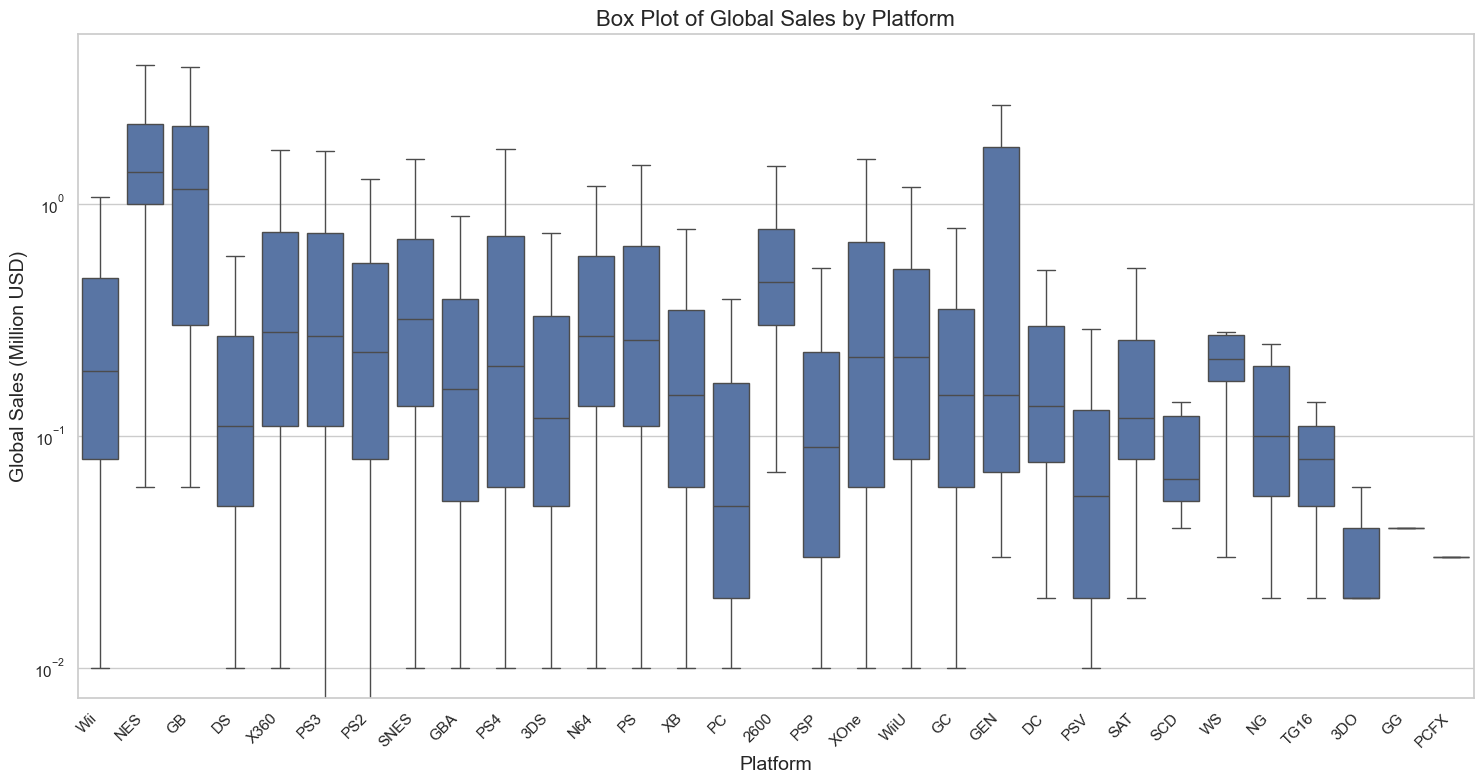

In [164]:
# Set up seaborn style for enhances the visual appeal
sns.set(style="whitegrid")


plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="platform", y="total_sales", data=video_games_df, showfliers=False)
ax.set_yscale("log")  # Use log scale for better visualization of skewed data
ax.set_xlabel("Platform", fontsize=14)
ax.set_ylabel("Global Sales (Million USD)", fontsize=14)
ax.set_title("Box Plot of Global Sales by Platform", fontsize=16)
plt.xticks(
    rotation=45, ha="right"
)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

In [165]:
boxplot_results = video_games_df.groupby("platform")["total_sales"].describe()

# Display the summary statistics
print(boxplot_results)

           count      mean       std   min     25%    50%     75%    max
platform                                                                
2600       133.0  0.729173  0.917799  0.07  0.3000  0.460  0.7800   7.81
3DO          3.0  0.033333  0.023094  0.02  0.0200  0.020  0.0400   0.06
3DS        520.0  0.498077  1.430876  0.01  0.0500  0.120  0.3300  14.60
DC          52.0  0.306731  0.468660  0.02  0.0775  0.135  0.2975   2.41
DS        2151.0  0.374765  1.426451  0.01  0.0500  0.110  0.2700  29.80
GB          98.0  2.606735  5.365478  0.06  0.3025  1.165  2.1650  31.38
GBA        822.0  0.386679  0.896897  0.01  0.0525  0.160  0.3900  15.84
GC         556.0  0.357788  0.686346  0.01  0.0600  0.150  0.3525   7.06
GEN         29.0  1.061034  1.470645  0.03  0.0700  0.150  1.7600   6.02
GG           1.0  0.040000       NaN  0.04  0.0400  0.040  0.0400   0.04
N64        319.0  0.685517  1.316733  0.01  0.1350  0.270  0.5950  11.90
NES         98.0  2.561735  5.108012  0.06  1.0000 

### Significance of Differences in Sales:
- The total sales vary significantly across different platforms. For example, PS2 has notably high total sales (1255.77 million USD), while some platforms like PCFX and GG have very low sales (0.03 and 0.04 million USD, respectively). Notably successful platforms include PS2, X360, Wii, and PS3, each with total sales exceeding 900 million USD.
It's evident that the gaming industry has seen platforms with diverse levels of success and market penetration.<br>

### Average Sales on Various Platforms:
- Platforms with high average sales may not necessarily have the highest total sales. For instance, while PS2 has the highest total sales, its average sales per game might be lower than platforms with fewer game releases but higher average sales. It's crucial to consider both total sales and average sales to understand the overall performance of a platform.

### Findings from the Box Plot

#### PS2:
- **Mean Sales:** PS2 has an average (mean) global sales of approximately 0.58 million units per game.
- **Sales Range:** The sales range from a minimum of 0 to a maximum of 20.81 million units per game.
- **Spread of Sales:** The majority of games (75%) have sales below 0.56 million units, with a few exceptional titles contributing to the higher mean.

#### X360:
- **Mean Sales:** X360 has an average global sales of around 0.77 million units per game.
- **Sales Range:** The sales range from a minimum of 0.01 to a maximum of 21.82 million units per game.
- **Spread of Sales:** Most games (75%) have sales below 0.76 million units, with notable exceptions driving the higher average.

#### PS3:
- **Mean Sales:** PS3 has an average global sales of about 0.71 million units per game.
- **Sales Range:** The sales range from a minimum of 0 to a maximum of 21.05 million units per game.
- **Spread of Sales:** The majority of games (75%) have sales below 0.75 million units, with some standout titles contributing to the higher mean.

#### Wii:
- **Mean Sales:** Wii has an average global sales of approximately 0.69 million units per game.
- **Sales Range:** The sales range from a minimum of 0.01 to a maximum of 82.54 million units per game.
- **Spread of Sales:** Most games (75%) have sales below 0.48 million units, but a few exceptionally successful titles significantly impact the higher average.

#### DS:
- **Mean Sales:** DS has an average global sales of around 0.37 million units per game.
- **Sales Range:** The sales range from a minimum of 0.01 to a maximum of 29.80 million units per game.
- **Spread of Sales:** The majority of games (75%) have sales below 0.27 million units, with some standout titles influencing the higher mean.


### These findings suggest that while there is a general trend in the industry, individual platform performance can vary significantly. Some platforms achieve higher average sales due to a few blockbuster titles, while others have more consistent but lower-performing games.

### Scatter plot and Correlation for User Score vs. Sales on a Popular Platform

Available platforms:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


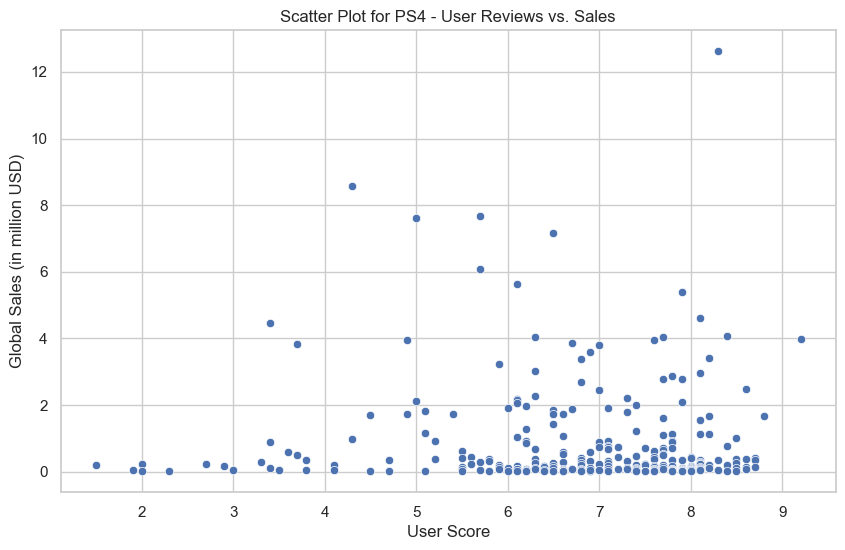


Correlation between user reviews and sales for PS4: -0.03


In [166]:
# Refactored code for scatter plot and correlation with a list of available platforms
def user_reviews_vs_sales_scatter():
    # Display available platforms
    print("Available platforms:")
    print(video_games_df['platform'].unique())
    
    # Choose a platform
    chosen_platform = input("Choose a platform from the list above: ")
    
    # Check if the chosen platform is valid
    if chosen_platform not in video_games_df['platform'].unique():
        print("Invalid platform. Please choose a valid platform.")
        return
    
    platform_data = video_games_df[video_games_df['platform'] == chosen_platform]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
    plt.title(f'Scatter Plot for {chosen_platform} - User Reviews vs. Sales')
    plt.xlabel('User Score')
    plt.ylabel('Global Sales (in million USD)')
    plt.show()

    correlation_user_sales = platform_data['user_score'].corr(platform_data['total_sales'])
    print(f"\nCorrelation between user reviews and sales for {chosen_platform}: {correlation_user_sales:.2f}")

# Perform user_reviews_vs_sales_scatter function
user_reviews_vs_sales_scatter()


### Comparison of Sales for the Same Games on Other Platforms


Comparison of sales for the same games on other platforms:
platform
2600     0.62
3DS     15.14
DS       0.10
GC       1.30
PC       9.44
PS3     21.46
PS4     76.22
PSP      0.09
PSV      6.48
Wii      0.18
WiiU     6.84
X360    26.00
XOne    31.02
Name: total_sales, dtype: float64


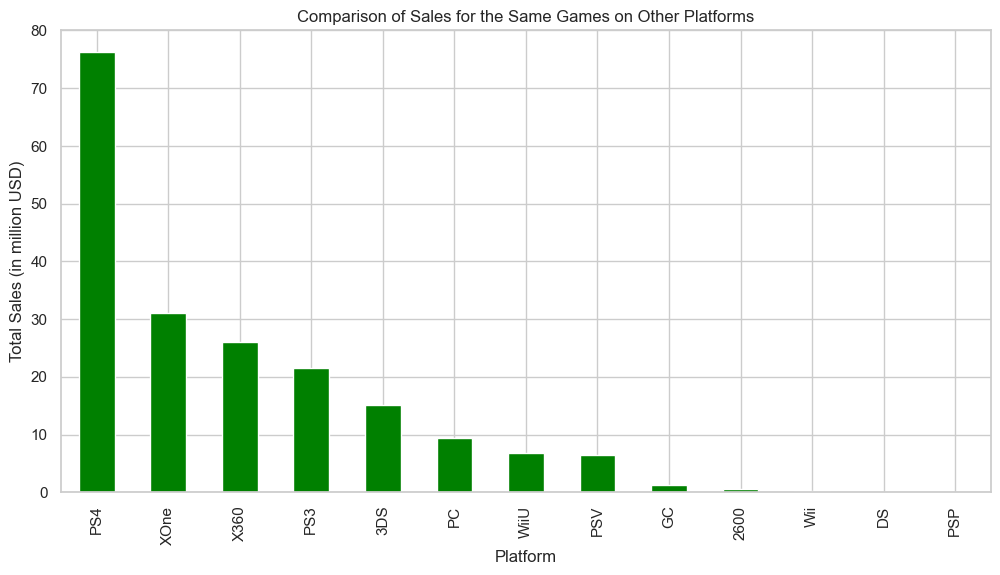

In [167]:
# Comparing sales on other platforms
def compare_sales_other_platforms(relevant_data):
    same_games_on_other_platforms = video_games_df[
        video_games_df["name"].isin(relevant_data["name"])
    ]

    print("\nComparison of sales for the same games on other platforms:")
    grouped_sales = same_games_on_other_platforms.groupby("platform")[
        "total_sales"
    ].sum()
    print(grouped_sales)

    # Plotting the results
    plt.figure(figsize=(12, 6))
    grouped_sales.sort_values(ascending=False).plot(kind="bar", color="green")
    plt.title("Comparison of Sales for the Same Games on Other Platforms")
    plt.xlabel("Platform")
    plt.ylabel("Total Sales (in million USD)")
    plt.show()


# Use relevant_data obtained in the previous analysis
compare_sales_other_platforms(relevant_df)

### Observation
The comparison of total game sales across platforms reveals a dominance of PS4 and XOne, surpassing other platforms. Notably, X360 and PS3 still exhibit substantial sales, while PC and PSV contribute significantly. Some platforms like 3DS, GC, WiiU, and PSP show comparatively lower sales.

### General Distribution of Games by Genre

In [168]:
genre_distribution = video_games_df.groupby("genre")["total_sales"].sum()
display(genre_distribution)

genre
Action          1744.17
Adventure        237.59
Fighting         447.53
Misc             802.51
Platform         827.77
Puzzle           242.57
Racing           728.67
Role-Playing     934.56
Shooter         1052.45
Simulation       389.97
Sports          1331.27
Strategy         174.23
Name: total_sales, dtype: float64


Genre distribution of total sales:
genre
Action          1744.17
Adventure        237.59
Fighting         447.53
Misc             802.51
Platform         827.77
Puzzle           242.57
Racing           728.67
Role-Playing     934.56
Shooter         1052.45
Simulation       389.97
Sports          1331.27
Strategy         174.23
Name: total_sales, dtype: float64


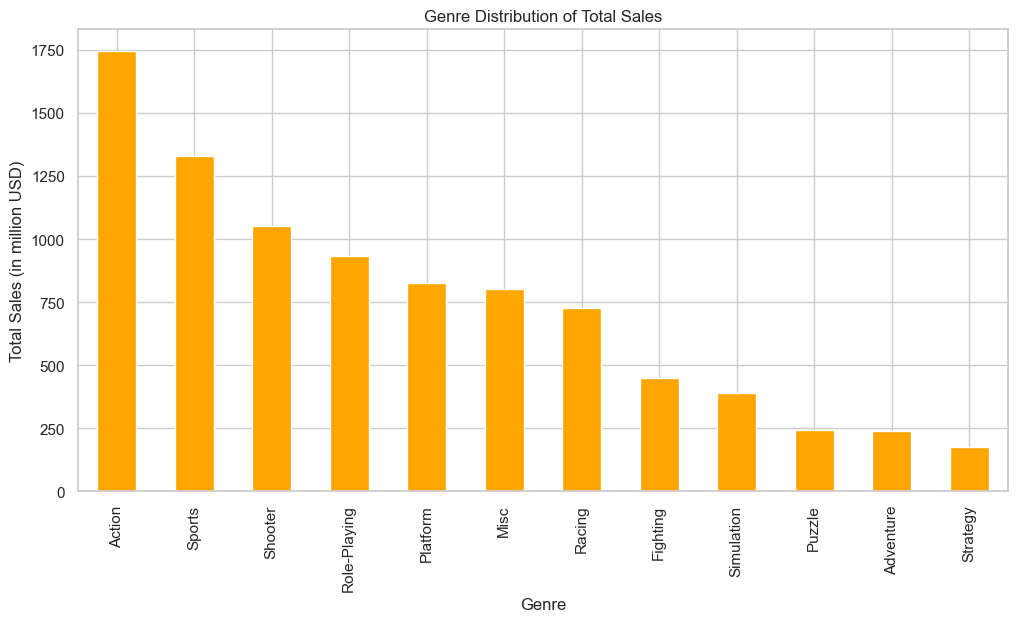

In [169]:
# Display genre distribution
print("\nGenre distribution of total sales:")
print(genre_distribution)

# Bar chart for better visualization
plt.figure(figsize=(12, 6))
genre_distribution.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Genre Distribution of Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in million USD)')
plt.show()

### Observation

The genre distribution of total sales provides valuable insights into the gaming industry. Action, Shooter, and Sports genres appear to be the most profitable, with significantly higher total sales compared to other genres. Role-Playing and Platform genres also contribute notably to total sales. Adventure, Strategy, and Puzzle genres have comparatively lower sales. This information suggests that game developers and publishers might find success by focusing on Action, Shooter, and Sports genres, considering their popularity and higher sales potential.


Top five platforms in na:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


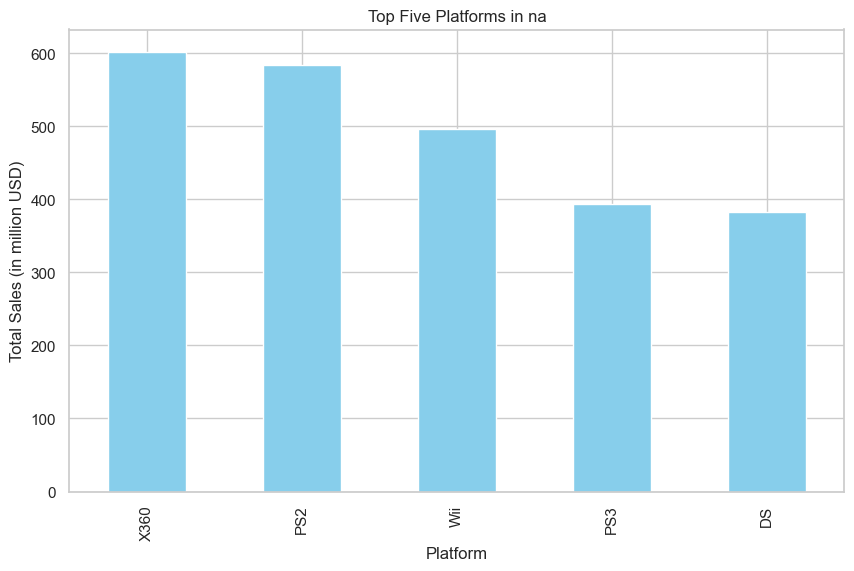


Top five genres in na:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


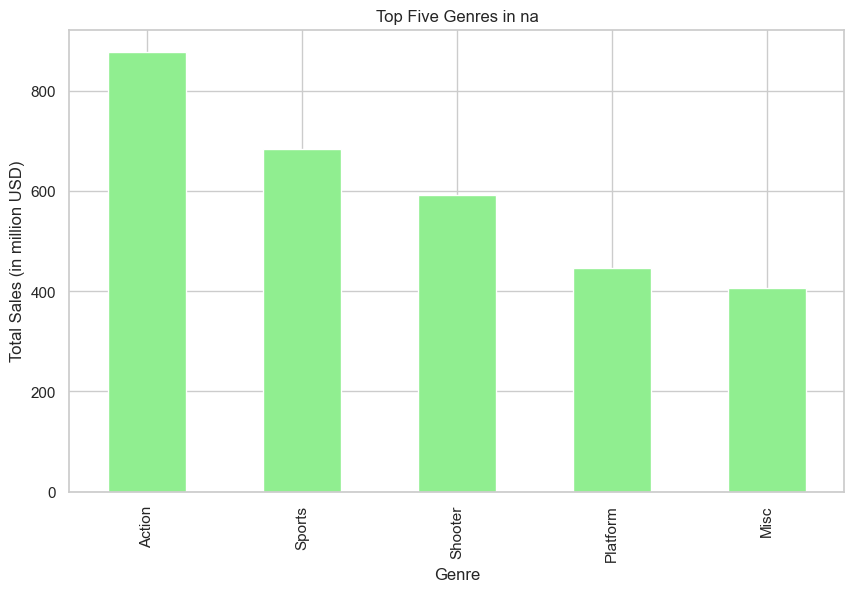


Effect of ESRB ratings on sales in na:
rating
AO         1.260000
E          0.324058
E10+       0.248817
EC         0.191250
K-A        0.853333
M          0.478874
RP         0.000000
T          0.256586
Unknown    0.183633
Name: na_sales, dtype: float64


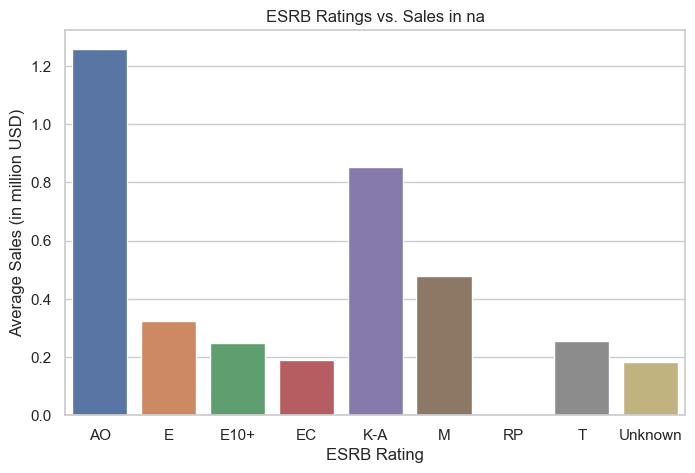


Top five platforms in eu:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


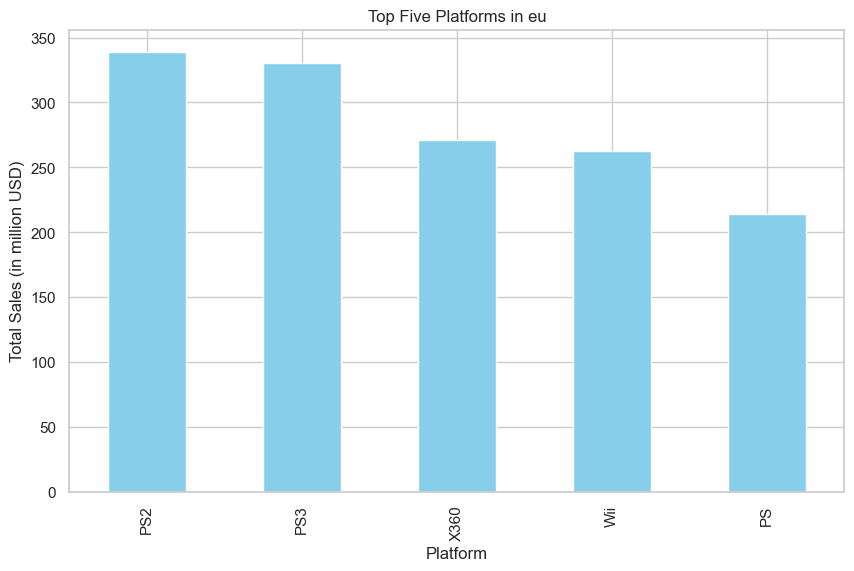


Top five genres in eu:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


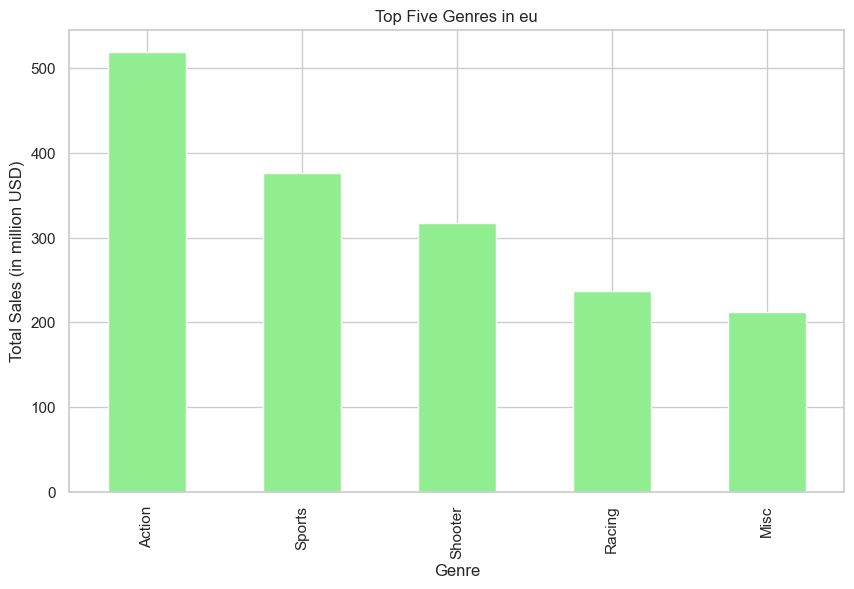


Effect of ESRB ratings on sales in eu:
rating
AO         0.610000
E          0.178008
E10+       0.132761
EC         0.013750
K-A        0.090000
M          0.309642
RP         0.026667
T          0.144218
Unknown    0.090723
Name: eu_sales, dtype: float64


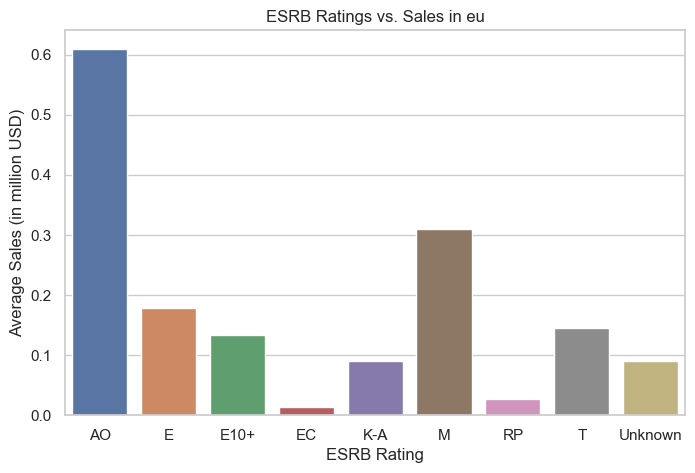


Top five platforms in jp:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


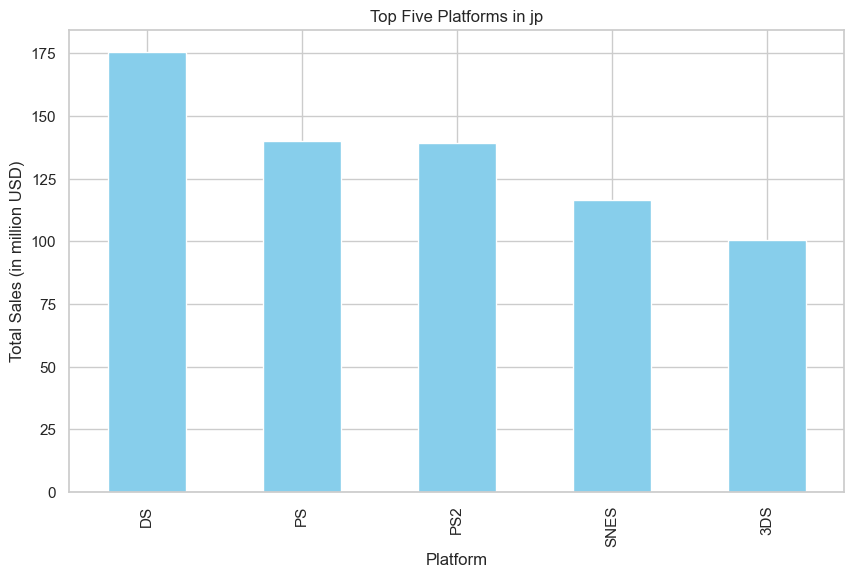


Top five genres in jp:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


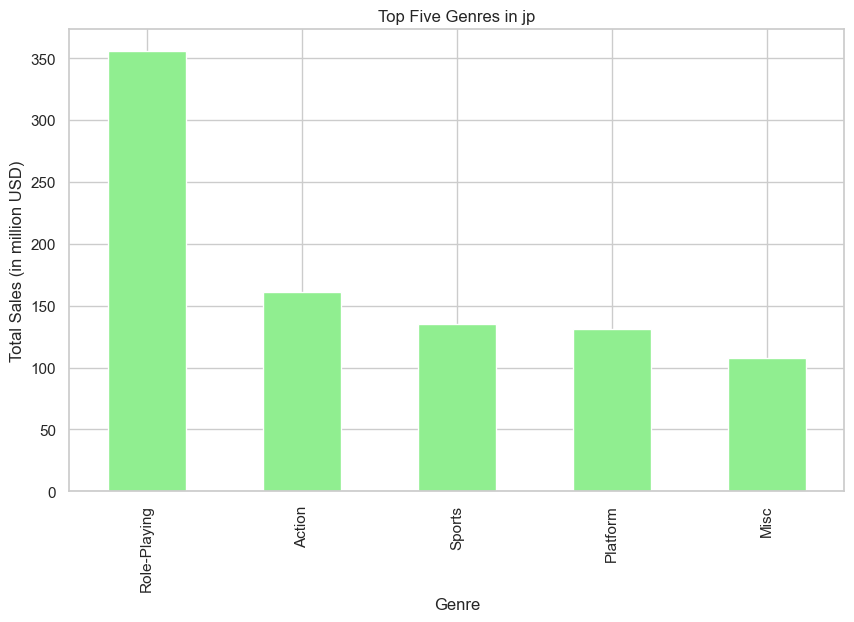


Effect of ESRB ratings on sales in jp:
rating
AO         0.000000
E          0.049652
E10+       0.028310
EC         0.000000
K-A        0.486667
M          0.041100
RP         0.000000
T          0.051131
Unknown    0.124440
Name: jp_sales, dtype: float64


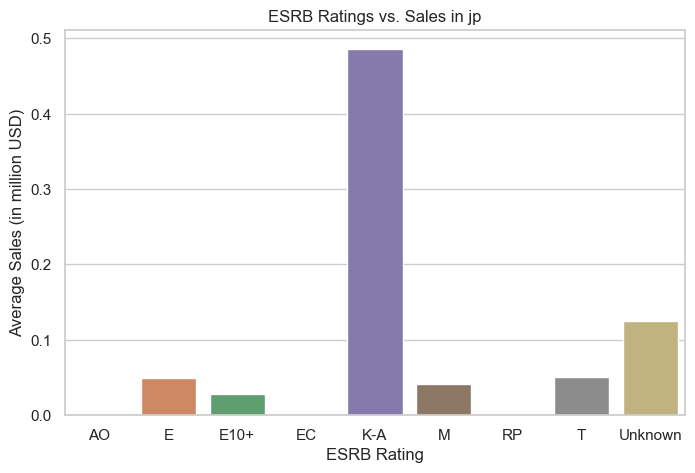

In [170]:
# Function to create user profiles for each region
def create_user_profiles(video_game_df):
    regions = ["na", "eu", "jp"]

    for region in regions:
        # Top five platforms
        top_platforms = (
            video_game_df.groupby("platform")[f"{region}_sales"].sum().nlargest(5)
        )
        print(f"\nTop five platforms in {region}:")
        print(top_platforms)

        # Plot market shares for top platforms
        plt.figure(figsize=(10, 6))
        top_platforms.plot(kind="bar", color="skyblue")
        plt.title(f"Top Five Platforms in {region}")
        plt.xlabel("Platform")
        plt.ylabel("Total Sales (in million USD)")
        plt.show()

        # Top five genres
        top_genres = video_game_df.groupby("genre")[f"{region}_sales"].sum().nlargest(5)
        print(f"\nTop five genres in {region}:")
        print(top_genres)

        # Plot genre distribution
        plt.figure(figsize=(10, 6))
        top_genres.plot(kind="bar", color="lightgreen")
        plt.title(f"Top Five Genres in {region}")
        plt.xlabel("Genre")
        plt.ylabel("Total Sales (in million USD)")
        plt.show()

        # ESRB ratings vs. sales
        esrb_vs_sales = video_game_df.groupby("rating")[f"{region}_sales"].mean()
        print(f"\nEffect of ESRB ratings on sales in {region}:")
        print(esrb_vs_sales)

        # Plot ESRB ratings vs. sales
        plt.figure(figsize=(8, 5))
        sns.barplot(x=esrb_vs_sales.index, y=esrb_vs_sales.values, hue=esrb_vs_sales.index, legend=False)
        plt.title(f"ESRB Ratings vs. Sales in {region}")
        plt.xlabel("ESRB Rating")
        plt.ylabel("Average Sales (in million USD)")
        plt.show()


# Call the function with your video_game_df
create_user_profiles(video_games_df)

## Summary:

**Platform Preferences:**
Preferences vary by region, with Xbox 360 being popular in North America, PlayStation platforms dominating in Europe, and Nintendo platforms, especially DS, leading in Japan.

**Genre Trends:**
Action and Shooter genres are consistently popular across regions, while role-playing games stand out in Japan.

**ESRB Rating Impact:**
The impact of ESRB ratings is limited, with AO having the highest average sales in North America and Europe, and K-A leading in Japan.


In [189]:
video_games_df["user_score_xbox"] = video_games_df[
    video_games_df["platform"] == "XOne"
]["user_score"]

video_games_df["user_score_pc"] = video_games_df[video_games_df["platform"] == "PC"][
    "user_score"
]

video_games_df["user_score_action"] = video_games_df[
    video_games_df["genre"] == "Action"
]["user_score"]

video_games_df["user_score_sports"] = video_games_df[
    video_games_df["genre"] == "Sports"
]["user_score"]


def conduct_hypothesis_test(data, group1, group2):
    try:
        t_statistic, p_value = stats.ttest_ind(
            data[group1], data[group2], nan_policy="omit"
        )
        return t_statistic, p_value
    except Exception as e:
        return f"Error: {e}"


# Conduct Hypothesis Tests
results_xbox_pc = conduct_hypothesis_test(
    video_games_df, "user_score_xbox", "user_score_pc"
)
results_action_sports = conduct_hypothesis_test(
    video_games_df, "user_score_action", "user_score_sports"
)

alpha = 0.05


# Print Results
print("Hypothesis Testing Results:")
print(f"1. Average User Ratings for Xbox One and PC Platforms:")
if isinstance(results_xbox_pc[0], (float, int)) and isinstance(
    results_xbox_pc[1], (float, int)
):
    print(f"   - T-Statistic: {np.round(results_xbox_pc[0], 2)}")
    print(f"   - P-Value: {np.round(results_xbox_pc[1], 2)}")
    if results_xbox_pc[1] < alpha:
        print("   - Reject the Null Hypothesis (Significant Difference).")
    else:
        print("   - Fail to Reject the Null Hypothesis (No significant difference).")
else:
    print(f"   - {results_xbox_pc}")

print(f"\n2. Average User Ratings for Action and Sports Genres:")
if isinstance(results_action_sports[0], (float, int)) and isinstance(
    results_action_sports[1], (float, int)
):
    print(f"   - T-Statistic: {np.round(results_action_sports[0], 2)}")
    print(f"   - P-Value: {np.round(results_action_sports[1], 2)}")
    if results_action_sports[1] < alpha:
        print("   - Reject the Null Hypothesis (Significant Difference).")
    else:
        print("   - Fail to Reject the Null Hypothesis (No significant difference).")
else:
    print(f"   - {results_action_sports}")

Hypothesis Testing Results:
1. Average User Ratings for Xbox One and PC Platforms:
   - T-Statistic: -4.37
   - P-Value: 0.0
   - Reject the Null Hypothesis (Significant Difference).

2. Average User Ratings for Action and Sports Genres:
   - T-Statistic: 1.63
   - P-Value: 0.1
   - Fail to Reject the Null Hypothesis (No significant difference).


## Understanding Hypothesis Testing 

### 1. Xbox One vs. PC User Ratings

#### Coming Up with the Hypotheses
- **(Null Hypothesis):** I start off by thinking that there's no real difference in how people rate games on Xbox One and PC. In other words, "I don't think there's anything special going on between these two platforms in terms of ratings."
- **(Alternative Hypothesis):** But what I really want to find out is whether there is actually a difference. So, my alternative hypothesis is basically saying, "I think there might be a difference in how games are rated on Xbox One compared to PC."

#### Choosing a Significance Level
- **Why 0.05?:** In hypothesis testing, I need to decide how sure I want to be before I say othe results aren't just happening by chance. A common choice is 0.05, which is like saying, "I'm okay with there being a 5% chance that I might be wrong in thinking there's a difference." It's a good middle ground – not too risky, but also not too cautious.

### 2. Action vs. Sports Game Ratings

#### Forming the Hypotheses
- **(Null Hypothesis):** Here, I begin by assuming that players rate Action and Sports games similarly. This is my baseline assumption.
- **(Alternative Hypothesis):** But what I'm curious about is whether these two genres actually get different ratings from players. So, my alternative hypothesis is something like, "I think there's a noticeable difference in ratings between Action games and Sports games."

#### Why Stick with 0.05
- **Why 0.05?:** Again, I stick with the 0.05 level because it's a nice balance. It means I'm being careful not to jump to conclusions, but also not so strict that I miss seeing a real difference if there is one.